In [17]:
import pandas as pd
data=pd.read_csv("C:\\Users\\R.N.V Siva Karthik\\Downloads\heart.csv")

In [18]:
data.head()
data.shape

(303, 14)

In [19]:
x=data.drop(columns=['target'],axis=1)
y=data['target']

In [20]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


<BarContainer object of 2 artists>

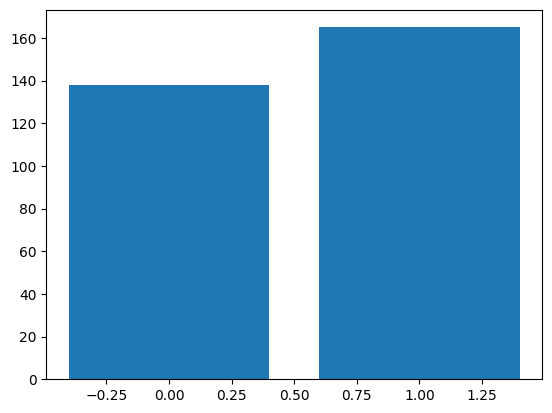

In [21]:
import matplotlib.pyplot as plt
plt.bar(y.unique(),y.value_counts())

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
ssp=StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=40)
trainids,testids=next(ssp.split(x,y))
xtrain=x.iloc[trainids,:]
ytrain=y.iloc[trainids]
xtest=x.iloc[testids,:]
ytest=y.iloc[testids]

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
preds=lr.predict(xtest)


C:\Users\R.N.V Siva Karthik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import (recall_score,precision_score,accuracy_score,f1_score,confusion_matrix)

def metricss(ytest,preds):
    print("accuracy:",accuracy_score(ytest,preds))
    print("precision:",precision_score(ytest,preds))
    print("recall:",recall_score(ytest,preds))
    print("f1 score:",f1_score(ytest,preds))
    print("confusion matrix:\n",confusion_matrix(ytest,preds))

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
preds=lr.predict(xtest)
metricss(preds,ytest)

accuracy: 0.9120879120879121
precision: 0.9607843137254902
recall: 0.8909090909090909
f1 score: 0.9245283018867925
confusion matrix:
 [[34  2]
 [ 6 49]]


C:\Users\R.N.V Siva Karthik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ran',RandomForestClassifier())])
fin={
    'ran__n_estimators':[50,100,200,300],
    'ran__max_depth':[5,10,12,14,16,18,20,30],
    'ran__max_samples':[0.1,0.2,0.3,0.4,0.5,0.6]
}
gsv_ran=GridSearchCV(pipe,fin)
gsv_ran.fit(xtrain,ytrain)
metricss(gsv_ran.predict(xtest),ytest)

accuracy: 0.8351648351648352
precision: 0.8235294117647058
recall: 0.875
f1 score: 0.8484848484848485
confusion matrix:
 [[34  9]
 [ 6 42]]


In [37]:
gsv_ran.best_params_

{'ran__max_depth': 30, 'ran__max_samples': 0.5, 'ran__n_estimators': 100}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
pipe=Pipeline([('gbc',GradientBoostingClassifier(learning_rate=0.1))])
fin={
    'gbc__n_estimators':[50,100,200,300],
    'gbc__subsample':[0.1,0.2,0.3,0.4,0.5,0.6]
}
gsv_gbc=GridSearchCV(pipe,fin,n_jobs=2,cv=5)
gsv_gbc.fit(xtrain,ytrain)
metricss(gsv_gbc.predict(xtest),ytest)

accuracy: 0.8571428571428571
precision: 0.9019607843137255
recall: 0.8518518518518519
f1 score: 0.8761904761904761
confusion matrix:
 [[32  5]
 [ 8 46]]


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
fin={ 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf'] 
   }
gsv_svm=GridSearchCV(SVC(),fin,n_jobs=2,cv=10)
gsv_svm.fit(xtrain,ytrain)
metricss(gsv_svm.predict(xtest),ytest)

accuracy: 0.8241758241758241
precision: 0.8241758241758241
recall: 0.8241758241758241
f1 score: 0.8241758241758241
confusion matrix:
 [[30  6]
 [10 45]]


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
pipe=Pipeline([('knn',KNeighborsClassifier())])
fin={
    'knn__n_neighbors':[1,2,3,4,5,10,15,16,17,18,19]
}
gsv_knn=GridSearchCV(pipe,fin,n_jobs=2,cv=10)
gsv_knn.fit(xtrain,ytrain)
metricss(gsv_knn.predict(xtest),ytest)
gsv_knn.score(xtest,ytest)

accuracy: 0.7362637362637363
precision: 0.7362637362637363
recall: 0.7362637362637363
f1 score: 0.7362637362637363
confusion matrix:
 [[29 13]
 [11 38]]


0.7362637362637363